# Kaggle Competition: Cats or Dogs Classification

Try using several models to train this dataset:

1) Convolutional Neural Network

2) VGGNet16


In [1]:
# For visualization
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline
# For importing and preparing data 
import os, cv2, re, random
import numpy as np
import pandas as pd
from tqdm import tqdm 
# For modeling
from keras.layers import Input, Convolution2D, MaxPooling2D
from keras.models import Model, Sequential
from keras_preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.model_selection import train_test_split
from keras import optimizers

Using TensorFlow backend.


## Explore and Prepare data

In [2]:
TRAIN_DIR = '../input/dogs-vs-cats-redux-kernels-edition/train/'
TEST_DIR = '../input/dogs-vs-cats-redux-kernels-edition/test/'
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] 
test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

train_dogs = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]

IMG_SIZE = 150
CHANNELS = 3
EPOCHES = 50

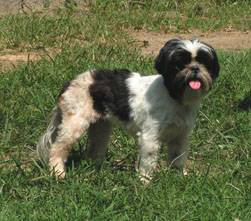

In [3]:
# check some images
load_img(train_dogs[0])

#### Prepare Training dataset

In [4]:
# not all the images are perfectly squared
# Generate the labels
labels = []
for i in os.listdir(TRAIN_DIR):
    if 'dog' in i:
        labels.append('dog')
    else:
        labels.append('cat')


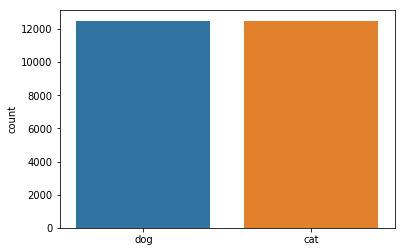

In [5]:
sns.countplot(labels)

In [6]:
train_df = pd.DataFrame(data = {'img_filepath': os.listdir(TRAIN_DIR), 'label': labels})
train_df.head(5)

,img_filepath,label
0,dog.5743.jpg,dog
1,cat.10685.jpg,cat
2,cat.5263.jpg,cat
3,dog.8472.jpg,dog
4,cat.10632.jpg,cat


In [7]:
train_df, validate_df = train_test_split(train_df, test_size=0.20, random_state=56)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [8]:
train_df['label'].value_counts()

dog    10011
cat     9989
Name: label, dtype: int64

In [9]:
validate_df['label'].value_counts()

cat    2512
dog    2489
Name: label, dtype: int64

In [10]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "../input/dogs-vs-cats-redux-kernels-edition/train", 
    x_col='img_filepath',
    y_col='label',
    target_size=(IMG_SIZE,IMG_SIZE),
    class_mode='categorical',
    batch_size=15
)

Found 19999 validated image filenames belonging to 2 classes.


/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 1 invalid image filename(s) in x_col="img_filepath". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [11]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "../input/dogs-vs-cats-redux-kernels-edition/train", 
    x_col='img_filepath',
    y_col='label',
    target_size=(IMG_SIZE,IMG_SIZE),
    class_mode='categorical',
    batch_size=15
)

Found 5001 validated image filenames belonging to 2 classes.


In [12]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

## Modeling

### 1) CNN -multiply layers

In [ ]:
# model = Sequential()

# model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(IMG_SIZE, IMG_SIZE, FILTERS), activation='relu')) # colorful image => input_shape*3
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

# model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

# model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

# model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(2, activation ='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer= 'rmsprop', metrics=['accuracy'])

# model.summary()

### 2) VGG16

In [15]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model2 = Sequential()
model2.add(VGG16(weights='imagenet', include_top=False, input_shape =(IMG_SIZE,IMG_SIZE,CHANNELS)))
model2.add(BatchNormalization())

model2.add(Flatten())
model2.add(Dense(256, activation='relu'))

model2.add(Dropout(0.5))
model2.add(Dense(2, activation ='softmax'))


In [16]:
model2.layers[0].trainable = False

In [17]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
batch_normalization_2 (Batch (None, 4, 4, 512)         2048      
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 514       
Total params: 16,814,658
Trainable params: 2,098,946
Non-trainable params: 14,715,712
__________________________________

In [18]:
rmsprop = optimizers.RMSprop(learning_rate=0.001, rho=0.9)
model2.compile(loss='categorical_crossentropy', optimizer= rmsprop, metrics=['accuracy'])


In [19]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [20]:
result = model2.fit_generator(train_generator, 
                             epochs = EPOCHES, 
                             validation_data=validation_generator,
                             validation_steps=total_validate//batch_size,
                             steps_per_epoch=total_train//batch_size,
                             callbacks=callbacks, 
                             verbose = 1)

Epoch 1/50
1333/1333 [==============================] - 205s 154ms/step - loss: 0.4881 - accuracy: 0.8240 - val_loss: 0.2011 - val_accuracy: 0.8829
Epoch 2/50
1333/1333 [==============================] - 169s 127ms/step - loss: 0.3945 - accuracy: 0.8454 - val_loss: 0.3005 - val_accuracy: 0.9079
Epoch 3/50
1333/1333 [==============================] - 170s 128ms/step - loss: 0.3814 - accuracy: 0.8533 - val_loss: 0.3805 - val_accuracy: 0.9029
Epoch 4/50
1333/1333 [==============================] - 171s 128ms/step - loss: 0.3916 - accuracy: 0.8563 - val_loss: 0.0712 - val_accuracy: 0.8985

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 5/50
1333/1333 [==============================] - 172s 129ms/step - loss: 0.3391 - accuracy: 0.8736 - val_loss: 0.1754 - val_accuracy: 0.9140
Epoch 6/50
1333/1333 [==============================] - 173s 129ms/step - loss: 0.3415 - accuracy: 0.8719 - val_loss: 0.1441 - val_accuracy: 0.9178
Epoch 7/50
1333/1333 [=========

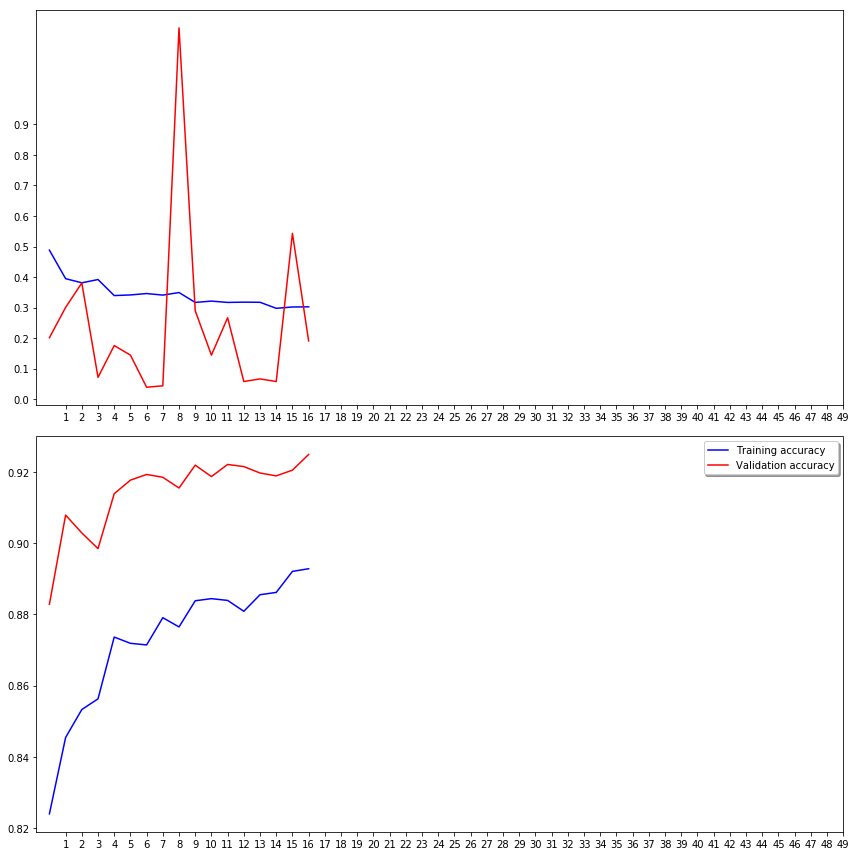

In [21]:
# Visualize the training
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(result.history['loss'], color='b', label="Training loss")
ax1.plot(result.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, EPOCHES, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(result.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(result.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, EPOCHES, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

#### Predict on test set

In [77]:
test_df = pd.DataFrame({'img_filepath': os.listdir(TEST_DIR)})
test_df = test_df[test_df['img_filepath'] != 'test']
nb_samples = test_df.shape[0]
nb_samples

12500

In [41]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "../input/dogs-vs-cats-redux-kernels-edition/test", 
    x_col='img_filepath',
    y_col=None,
    class_mode=None,
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


In [42]:
predict = model2.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [84]:
test_df['category'] = np.argmax(predict, axis=-1)
test_df['label'] = predict[:,1]

test_df.tail()

,img_filepath,category,label
12496,3412.jpg,1,9.999887e-01
12497,271.jpg,1,1.000000e+00
12498,11505.jpg,0,2.825707e-01
12499,7508.jpg,0,6.328732e-16
12500,4735.jpg,0,3.393487e-01


In [26]:
# label_map = dict((v,k) for k,v in train_generator.class_indices.items())
# test_df['label'] = test_df['label'].replace(label_map)
# test_df['label'] = test_df['label'].replace({ 'dog': 1, 'cat': 0 })

In [85]:
test_df['category'].value_counts()

0    6338
1    6162
Name: category, dtype: int64

#### See predicted result with images

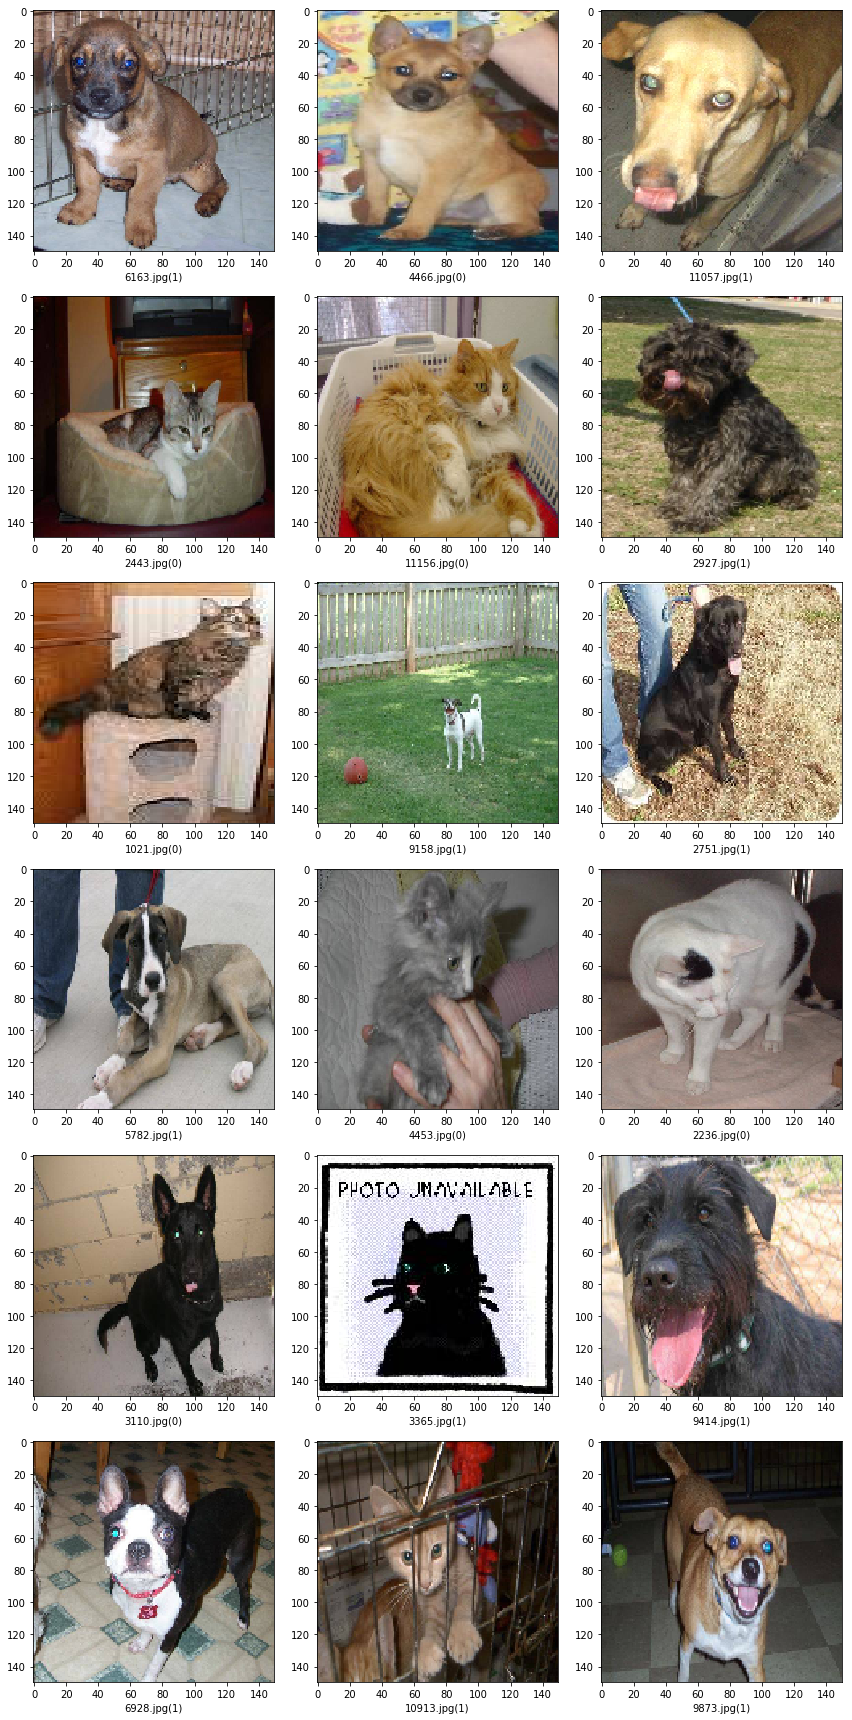

In [86]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['img_filepath']
    category = row['category']
    img = load_img("../input/dogs-vs-cats-redux-kernels-edition/test/"+filename, target_size=(IMG_SIZE, IMG_SIZE))
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

#### Submission

In [87]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['img_filepath'].str.split('.').str[0]
submission_df.drop(['img_filepath','category'], axis=1, inplace=True)
submission_df = submission_df[['id', 'label']]
submission_df.to_csv('submission.csv', index=False)